In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import operator
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
%matplotlib inline
df = pd.read_csv("./data/notas_merged.csv")

del df["NUMORD"]
del df["SUBTIPO"]
del df["CENTRO"]
del df["PLAN"]
del df["NOTA_BASE_4"]
categorical_columns = ["CURSO","ANOCON","MUNICIPIO","PROVINCIA","DESPLAN","GENERO"]

COLORS = ["red","blue","yellow","pink","purple","green"]
DESCRIPTIONS = {
    "CURSO": ["There are ", " students from the year "],
    "ANOCON": ["There are ", " students who graduated in "],
    "MUNICIPIO": ["There are ", " students from the municipality of"],
    "PROVINCIA": ["There are ", " students from the province of "],
    "DESPLAN": ["There are ", "students of the plan "],
    "GENERO": ["The are ", " students of gender "]
}

def write_pdf(fname, figures):
    doc = PdfPages(fname)
    for fig in figures:
        print(type(fig))
        fig.savefig(doc, dpi="figure",format='pdf')
    doc.close()
    
category_counts = {}
for c in categorical_columns:
    df[c] = df[c].astype("category")
    category_counts[c] = dict(df[c].value_counts() )

df = df.sort_values("CURSO")

In [199]:
?PdfPages

In [2]:
df.head()

,CURSO,ANOCON,MUNICIPIO,PROVINCIA,NOTA_BASE_10,DESPLAN,GENERO
773,1993-94,1993-94S,MADRID,MADRID,6.24,45091 - INGENIERIA TECNICA EN INFORMATICA DE G...,M
772,1993-94,1993-94S,MADRID,MADRID,6.60,45091 - INGENIERIA TECNICA EN INFORMATICA DE G...,M
771,1993-94,1993-94S,MADRID,MADRID,7.34,45091 - INGENIERIA TECNICA EN INFORMATICA DE G...,H
260,1994-95,1994-95J,GETAFE,MADRID,6.84,45091 - INGENIERIA TECNICA EN INFORMATICA DE G...,M
278,1994-95,1994-95J,LEGANES,MADRID,5.90,45191 - INGENIERIA TECNICA EN INFORMATICA DE S...,M


In [353]:
#At this point we have  df, category_counts
def get_most_frequents(category_counts):
    """ Generates most frequent dictionary """
    category_counts_most_frequent = {}
    for c in category_counts:
        max_cat = max(category_counts[c].items(), key=operator.itemgetter(1))[0]
        print(max_cat)
        category_counts_most_frequent[c] = {
                max_cat : category_counts[c][max_cat]
        }
    return category_counts_most_frequent
    

# + add title
def generate_grade_plot(X, title=None):
    fig_info = {}
    if title:
        fig_info["title"]=title
    fig_info["arg"] = X["NOTA_BASE_10"]
    fig_info["color"] = random.choice(COLORS)
    return fig_info
 
#def generate_grade_plot(X,title=None):
#    """ Generates grade plot for a certain subgroup """
#    fig = plt.figure()
#    return X.plot(kind='hist', y="NOTA_BASE_10",color=random.choice(COLORS), title=title)

def generate_grade_plots_2(X,c):
    """Generates grade plot for all categories in c"""
    plots = {}
    for cat in category_counts[c]:
        X_aux = X[X[c] == cat]
        plots[cat] = generate_grade_plot(X_aux)
    return plots

def generate_grade_plots(X):
    """Generates grade plot for all categorical cols in X"""
    plots = {}
    for c in categorical_columns:
        plots[c] = generate_grade_plots_2(X,c)
    return plots

def generate_category_count_pie(c,title=None):
    """Generates pie """
    p = {}
    p["title"] = title
    p["arg"] = [v for v in category_counts[c].values()]
    p["labels"] = [k for k in category_counts[c].keys()]
    p["colors"]=[random.choice(COLORS) for c in range(0,2)]
    return p

def generate_category_count_bar(c):
    fig = plt.figure()
    plt.bar(range(len(category_counts[c])), list(category_counts[c].values()), align='center',color=random.choice(COLORS))
    plt.xticks(range(len(category_counts[c])), list(category_counts[c].keys()))
    return fig

def generate_category_counts_bar():
    plots = {}
    for c in categorical_columns:
        plots[c] = generate_category_count_pie(c)
    return plots
 
def generate_description(category_counts):
    report = ""
    for c in categorical_columns:
        for cat in category_counts[c]:
            report += DESCRIPTIONS[c][0] + str(category_counts[c][cat]) + DESCRIPTIONS[c][1] + str(cat) +". "
    return report

In [348]:
# for student and teacher, generate the "course" input vs the total. In case of the student, inform him of which grade was his
def generate_student_report(profile, X):
    plots = {}
    c =  "CURSO"
    course = profile["curso"]
    
    X_course = X[X[c] == course]
    X_other = X[X[c] != course]
    
    plots_gradecmp_courses= [generate_grade_plot(X_course,"")]*4
    plots_gradecmp_all = [generate_grade_plot(X_other)]*4
    plots_dist_all = [generate_category_count_pie(c)]*4
    
    dn1 = "Your grade is " + profile["nota"] + ". The median grade of your course is " + str(np.median(X_course["NOTA_BASE_10"])) + " The median grade for other courses is around" + str(np.median(X_other["NOTA_BASE_10"]))
    dn2 =  "Your grade is " + profile["nota"] + ". The median grade of your course is " + str(np.median(X_course["NOTA_BASE_10"]))
    dn3 = "Your grade is " + profile["nota"] 
    dn4 = "The median grade of your course is " + str(np.median(X_course["NOTA_BASE_10"])) + " The median grade for other courses is around" + str(np.median(X_other["NOTA_BASE_10"]))
    # optionally 
    return [random.choice(plots_gradecmp_courses), random.choice(plots_gradecmp_all), random.choice(plots_dist_all)]
    
def generate_teacher_report(profile, X): 
    plots = {}
    c =  "CURSO"
    course = profile["curso"]
    
    X_course = X[X[c] == course]
    X_other = X[X[c] != course]
    
    plots_gradecmp_courses= [generate_grade_plot(X_course,"your course's grade distribution")] * 4
    plots_gradecmp_all = [generate_grade_plot(X_other),"all courses grade distribution" ] * 4
    plots_dist_all = [generate_category_count_pie(c)] * 4
    
    dn1 = "The median grade of your course is " + str(np.median(X_course["NOTA_BASE_10"])) + " The median grade for other courses is around" + str(np.median(X_other["NOTA_BASE_10"]))
    dn2 =  "The median grade of your course is " + str(np.median(X_course["NOTA_BASE_10"]))
    dn4 = "The median grade of your course is " + str(np.median(X_course["NOTA_BASE_10"])) + " The median grade for other courses is around" + str(np.median(X_other["NOTA_BASE_10"]))
    # optionally 
    return [random.choice(plots_gradecmp_courses), random.choice(plots_gradecmp_all), random.choice(plots_dist_all)]

def generate_delegate_report(profile, X):
    plots = {}
    
    X_h = X[X["GENERO"] == "H"]
    X_m = X[X["GENERO"] != "H"]
    
    dn1 = "The median grade of the female students is" + str(np.median(X_m["NOTA_BASE_10"])) + ".\n The median grade for male students is " + str(np.median(X_h["NOTA_BASE_10"])) + "."
    dn2 =  "The median grade of the female students is" + str(np.median(X_m["NOTA_BASE_10"]))
    dn3 = " The median grade for male students is " + str(np.median(X_h["NOTA_BASE_10"]))
    
    plots_gradecmp_female= [generate_grade_plot(X_m, dn2 + "as we can see in the table below.\n"+" female grade distribution\n") for i in range(0,4)]
    plots_gradecmp_male = [generate_grade_plot(X_h, "male grade distribution\n"+dn1) for i in range (0,4)] 
    plots_dist_all = [generate_category_count_pie("GENERO", "Gender distribution\n"+dn3) for i in range(0,4 )]
    
    # optionally 
    return [plots_gradecmp_female, plots_gradecmp_male, plots_dist_all]


In [77]:
student_profile = {
    "age": 20,
    "class": "student",
    "gender": "female",
    "nota": "7.5",
    "description": "wants to know how its own grade (given) compares to the rest of the students in its course (given)",
    "curso": "2003-04"
}
teacher_profile = {
    "age": 48,
    "class": "teacher",
    "gender": "female",
    "description": "",
    "curso": "2003-04"
}
gender_delegate = {
    "age": 38,
    "class": "manager",
    "description": "wants to know how students of different gender have been performing over the years",
    "gender": "male"
}

In [356]:
#report_std = generate_student_report(student_profile, df)
#generate_teacher_report(teacher_profile, df)
repo_delegate = generate_delegate_report(gender_delegate, df)

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


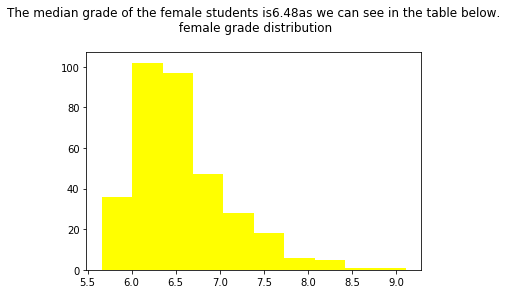

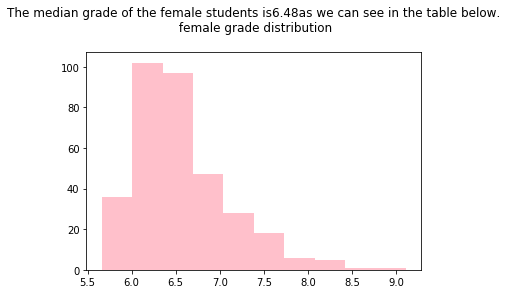

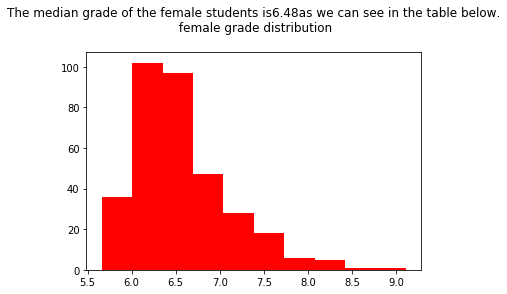

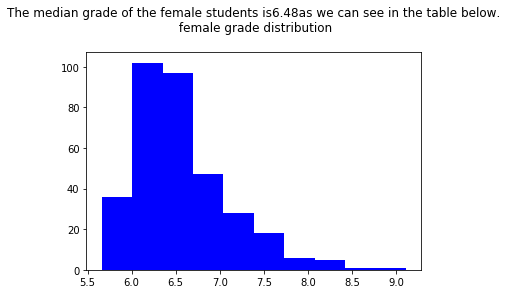

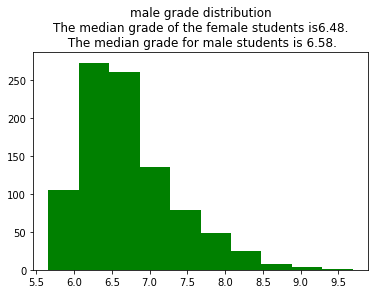

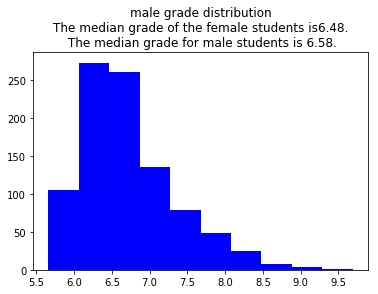

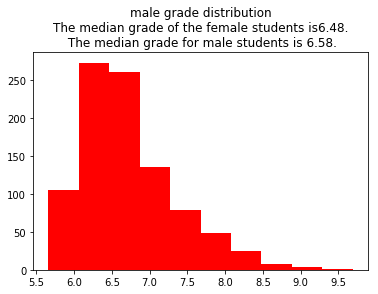

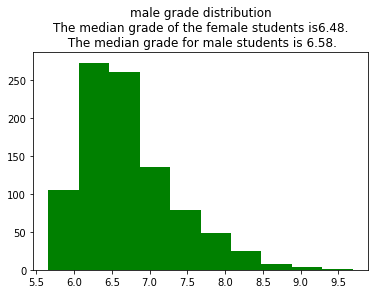

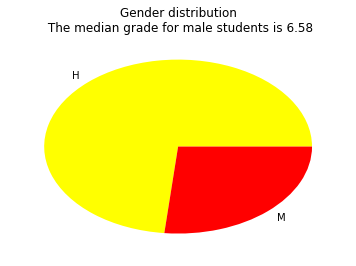

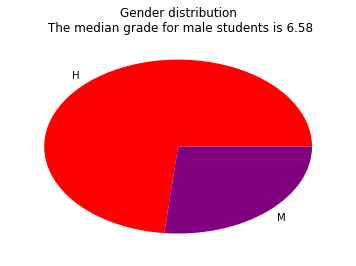

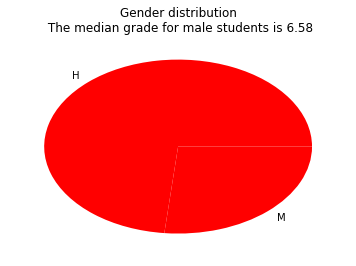

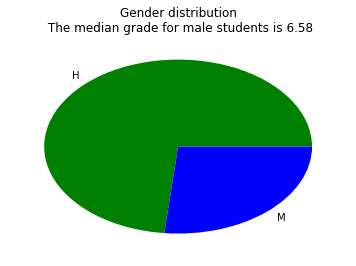

In [274]:
repo_delegate = generate_delegate_report(gender_delegate, df)

In [261]:
def save_report(report_name, results): 
    write_pdf("trytrytrytrytrytry.pdf",results)
def load_reports_for_tourney(report):pass

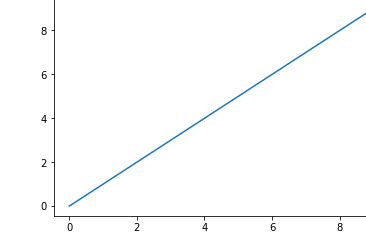

In [297]:
a = repo_delegate[0][0].add_subplot(ax=repo_delegate[0][1].axes.copy()

In [299]:
type(a)

NoneType

In [226]:
def show_2_choose_1(reports): pass #self explanatory, keep eliminating them
    # okay here's the idea : when the cell is executed, we load a copy of the reports array.
    # then we show 2, then we can either left() or right() in the below cell;
    # this eliminates either the one showed in the left (saved as var left) or the one in the right
    
def save_tournament_results(): pass

In [485]:
def generate_grade_plot(X, title=None):
    fig_info = {}
    fig_info["title"]=title
    fig_info["arg"] = X["NOTA_BASE_10"]
    fig_info["color"] = random.choice(COLORS)
    return fig_info

def generate_category_count_pie(c,title=None):
    """Generates pie """
    p = {}
    p["title"] = title
    p["arg"] = [v for v in category_counts[c].values()]
    p["labels"] = [k for k in category_counts[c].keys()]
    p["colors"]=[random.choice(COLORS) for c in range(0,2)]
    return p

def givemefigures(hist , pie):
    #fig = plt.figure()
    #plt.title(hist.title + pie.title)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    plt.title(hist["title"]+pie["title"])
    ax1.hist(hist["arg"],color=hist["color"])
    ax1.legend("PUT TITLE HERE")
    ax2.pie(pie["arg"],labels=pie["labels"],autopct=None,colors=pie["colors"])
    return fig#plt.close(fig1)

repo_delegate = generate_delegate_report(gender_delegate, df)
#givemefigures(repo_delegate[0][0],repo_delegate[2][0])

def create_10_reports(repo_someone):
    #pair each with one of the others
    chosen_ones = []
    for j in range(0,len(repo_someone[1])):
       chosen_ones.append((repo_someone[1][j], random.choice(repo_someone[2])))

    for i in range(0,len(repo_someone[0])):
        chosen_ones.append((repo_someone[0][i], random.choice(repo_someone[2])))
    plt.show()
    return chosen_ones
a = create_10_reports(repo_delegate)                             

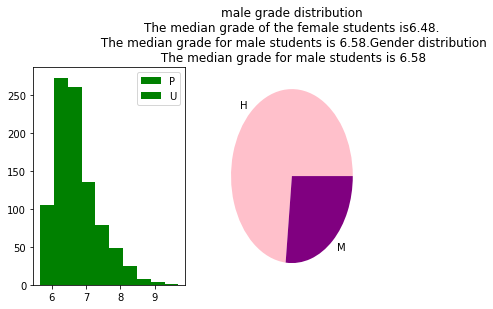

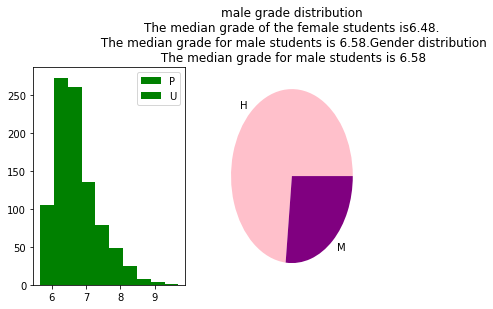

In [484]:
ind=3
givemefigures(a[ind][0],a[ind][1])

In [471]:
def write_pdf(fname, figures):
    for fig in figures:
        fig.savefig("somename1.png")

repo_delegate = generate_delegate_report(gender_delegate, df)

a = create_10_reports(repo_delegate)       
report = givemefigures(a[0][0],a[0][2])
i=0
title = "somename1"
i+=1
print(title)
#for f in report:
#    print(f.dpi)
# take axe 
write_pdf(title,[report])


IndexError: tuple index out of range

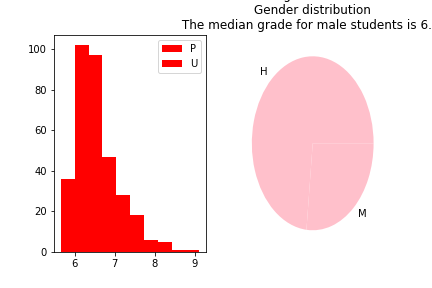

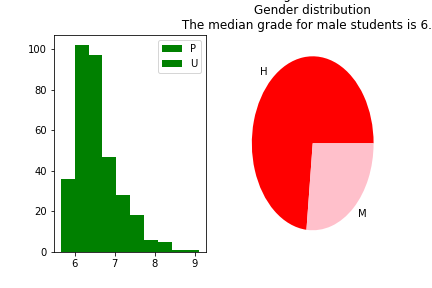

In [428]:
displayed = {
    "1": "a",
    "2": "b"
}
results = {
    "a": 0,
    "b": 0
}

import json
def pick_one(i):
    results[displayed[i]]+=1
    with open('result.json', 'w') as fp:
        json.dump(results, fp)


{'a': 9, 'b': 0}


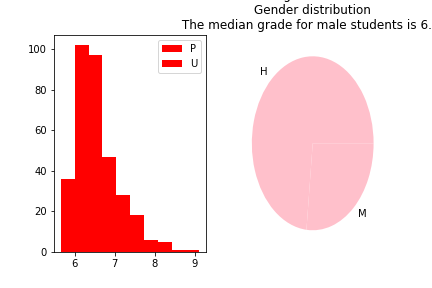

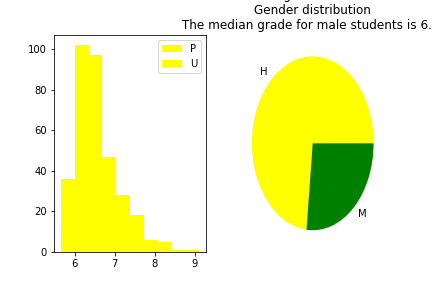

{'a': 9, 'b': 0}

In [447]:
from IPython.display import Image
from IPython.display import display
displayed = {
    "1": "a",
    "2": "b"
}
inc("a")

with open('result.json') as f:
    data = json.load(f)
results = data
print(results)
#pick 2
# update displayed

#actually display
x = Image("somename.png") 
y = Image("somename1.png")
display(x, y)
results

In [446]:
CHOICE = 1
# a or b
pick_one(str(CHOICE))
results

{'a': 9, 'b': 0}